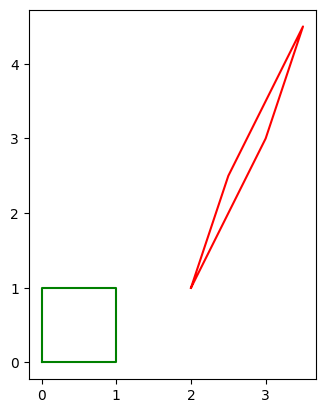

In [23]:
# Section 1
#http://ais.informatik.uni-freiburg.de/teaching/ws13/mapping/pdf/slam02-homegenous-4.pdf
import matplotlib.pyplot as plt
import numpy as np

# Points a, b, c, d
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]

X = np.array([a, b, c, d]).T
# Y = X + np.array([3, 4, 1]).reshape(3,1) # transfromed version of X


t = np.array([2, 1]).T


A  = np.array([[1, 0.5, t[0]], [2, 1.5, t[1]], [0, 0, 1]]) # Affine transformaiton
Y = A @ X
# Homographic transformation

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

# more examples on https://docs.opencv.org/4.x/dd/d52/tutorial_js_geometric_transformations.html

translation matrix [[ 1  2  5]
 [ 0  1 10]
 [ 0  0  1]]


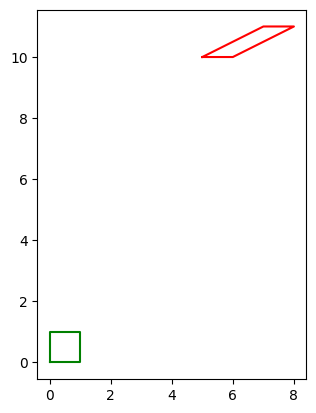

In [24]:
#Translation is the shifting of object's location.
#M is the translation matrix
M = np.array( [[1, 0, 5], [0, 1, 10],[0,0,1]]);
print("translation matrix",M)
Y = M @ X


x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

#For roation and transform
#theta = np.pi/180*60
# H = np.array([[np.cos(theta), -np.sin(theta), t[0]], [np.sin(theta), np.cos(theta), t[1]], [0, 0, 1]])
# Y = H @ X

In [5]:
#  Section 2
# Transfroming the first image onto the second
# Gaffiti images: https://www.robots.ox.ac.uk/~vgg/data/affine/
import numpy as np
import cv2 as cv
im1 = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('graf/img2.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im2 is not None

# H = np.array([[8.7976964e-01,   3.1245438e-01,  -3.9430589e+01],
#   [-1.8389418e-01,   9.3847198e-01,   1.5315784e+02],
#    [1.9641425e-04,  -1.6015275e-05,   1.0000000e+00]])

with open('graf/H1to2p') as f:
   H = np.array([[float(h) for h in line.split()] for line in f])

im1to2 = cv.warpPerspective(im1, H, (1000,1000))

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 2', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 2', im2)
cv.waitKey(0)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im1to2)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
# Transfroming the second image onto the first
import numpy as np
import cv2 as cv
im1 = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('graf/img2.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im2 is not None

with open(r'graf/H1to2p') as f:
   H = np.array([[float(h) for h in line.split()] for line in f])

im2to1 = cv.warpPerspective(im2, np.linalg.inv(H), (1000,1000))
im2to1[0:im1.shape[0], 0:im1.shape[1]] = im1
im2to1[0:im1.shape[0], 0:im1.shape[1]] += np.array([50, 0, 0], dtype=np.uint8) # Change te color a little

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 2', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 2', im2)
cv.waitKey(0)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im2to1)
cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
#  Section 3
#Transfroming the second image onto the first usign the homography computed
import numpy as np
import cv2 as cv
im1 = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('graf/img2.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im2 is not None

N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# Mouse callback function
def draw_circle(event, x, y, falgs, param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1], (x,y), 5, (255, 0, 0), -1)
        p[n] = (x,y)
        n +=1
# once image is opened, click five times to select matching points 
im1copy = im1.copy()
im2copy = im2.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1', draw_circle, param)
while(1):
    cv.imshow('Image 1', im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

n = 0
cv.namedWindow('Image 2', cv.WINDOW_AUTOSIZE)
param = [p2, im2copy]
cv.setMouseCallback('Image 2', draw_circle, param)

while(1):
    cv.imshow('Image 2', im2copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)
cv.destroyAllWindows()

H = cv.findHomography(p1, p2)
H

# Warping (complete yourself)




KeyboardInterrupt: 